In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read Data from CSV File
---

In [3]:
df = pd.read_csv("medical_examination.csv", index_col=0)
df.head(10)

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
8,21914,1,151,67.0,120,80,2,2,0,0,0,0
9,22113,1,157,93.0,130,80,3,1,0,0,1,0
12,22584,2,178,95.0,130,90,3,3,0,0,1,1
13,17668,1,158,71.0,110,70,1,1,0,0,1,0


In [5]:
df.shape

(70000, 12)

In [7]:
# Add an overweight column to the data. To determine if a person is overweight, 
# first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. 
# If that value is > 25 then the person is overweight.

height_in_meters = (df['height']/100) ** 2
bmi = df['weight'] / height_in_meters
df['overweight'] = (bmi > 25).astype(int)
df.head(10)

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
8,21914,1,151,67.0,120,80,2,2,0,0,0,0,1
9,22113,1,157,93.0,130,80,3,1,0,0,1,0,1
12,22584,2,178,95.0,130,90,3,3,0,0,1,1,1
13,17668,1,158,71.0,110,70,1,1,0,0,1,0,1



### Normalize the data
---

Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, \
make the value 0. If the value is more than 1, make the value 1.

In [10]:
# Normalize the data by making 0 always good and 1 always bad. 

df.loc[df['cholesterol'] == 1, 'cholesterol'] = 0
df.loc[df['cholesterol'] > 1, 'cholesterol'] = 1
df.loc[df['gluc'] == 1, 'gluc'] = 0
df.loc[df['gluc'] > 1, 'gluc'] = 1

In [12]:
df.columns

Index(['age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'overweight'],
      dtype='object')

## Convert the data
---
Convert the data into long format, using 'cardio' as the identifier variable, which will later be used to plot the data. The value variables are 'active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'. We are looking to understand the relationship between these health metrics and having cardiovascular disease (cardio=1) or no disease (cardio=0)

In [15]:
df_cat = pd.melt(df, id_vars='cardio',value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'],
                    value_name='value', var_name='feature')

## Plot the long format data
---

Create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by Cardio so there is one chart for each cardio value. Overall, the prevalence of most risk factors is higher in patients with cardiovascular disease (cardio=1) compared to those without (cardio=0). This suggests that these factors are associated with an increased risk of heart disease.

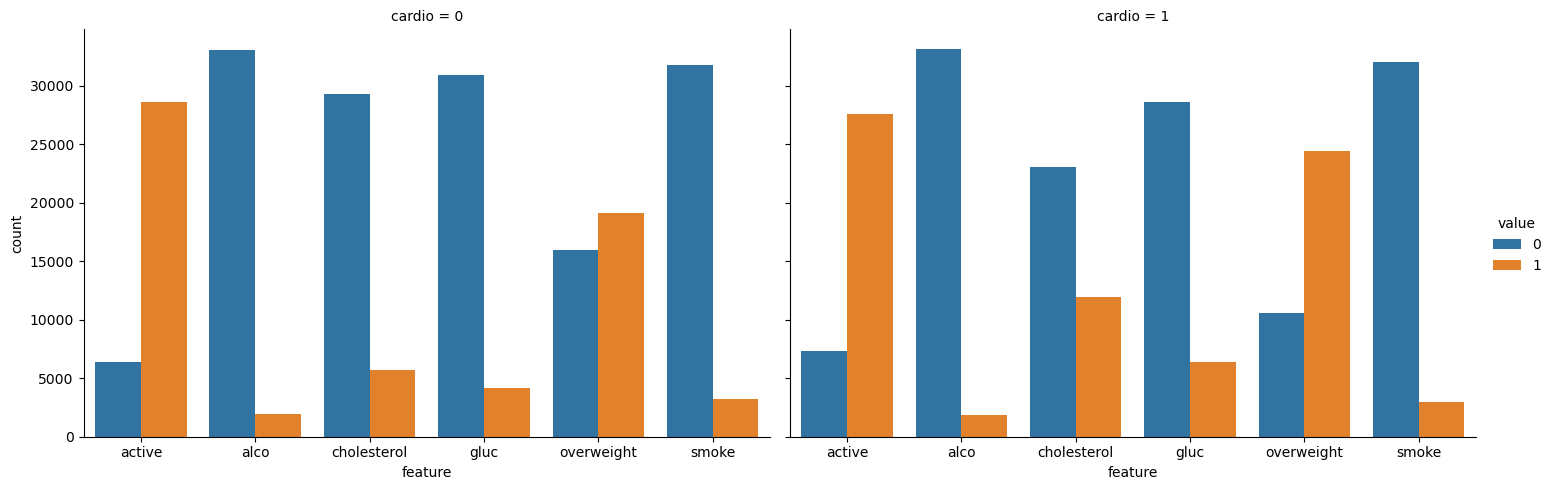

In [18]:
g = sns.catplot(data=df_cat, x='feature', hue='value', col='cardio', kind='count', height=5, aspect=1.5)

In [20]:
g.set_axis_labels('variable', 'total')

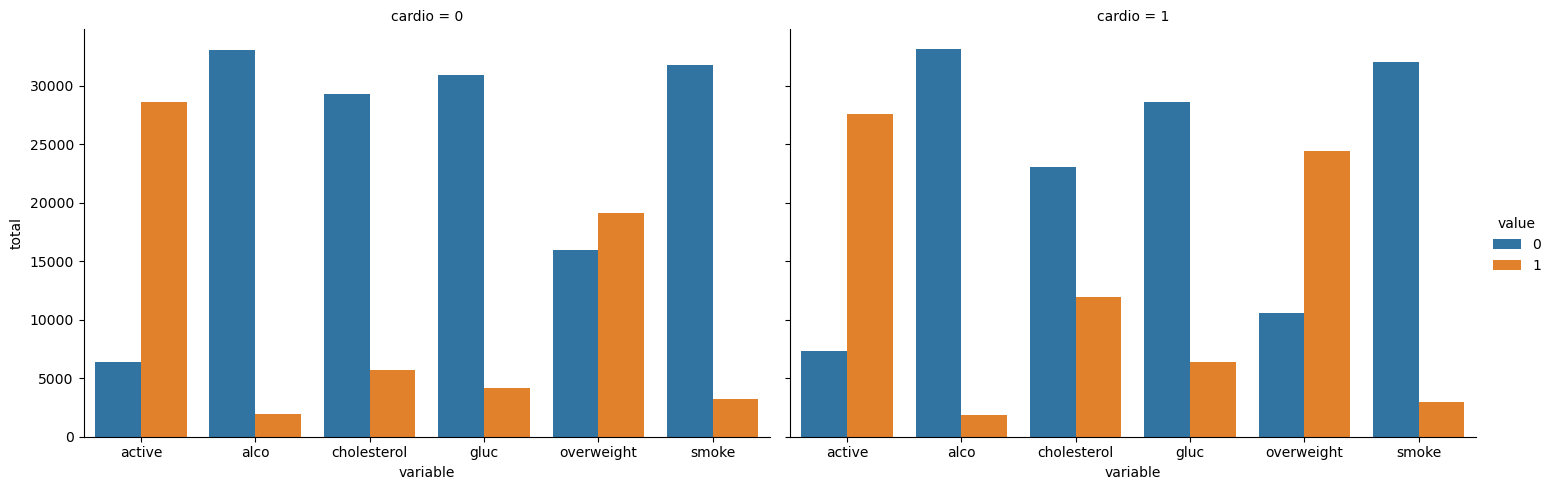

In [22]:
g.fig

## Clean the Data
---

- Filter out the patient segements where: diastolic pressure is higher than systolic pressure
- Filter out the patient segements where: weight is more than the 97.5th percentile
- Filter out the patient segements where: height is less than the 2.5th percentile
- Filter out the patient segements where: height is more than the 97.5th percentile
- Filter out the patient segements where: weight is less than the 2.5th percentile

In [26]:
df_heat = df

    # Clean the data
df_heat = df_heat[
    (df_heat['ap_lo'] <= df_heat['ap_hi']) &
    (df_heat['height'] >= df_heat['height'].quantile(0.025)) &
    (df_heat['height'] <= df_heat['height'].quantile(0.975)) &
    (df_heat['weight'] >= df_heat['weight'].quantile(0.025)) &
    (df_heat['weight'] <= df_heat['weight'].quantile(0.975))
]

## Correlation Matrix
---

In [29]:
correlation_matrix = df.corr().round(1)
print(correlation_matrix.shape)
correlation_matrix.head(14)

(13, 13)


,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
age,1.0,-0.0,-0.1,0.1,0.0,0.0,0.1,0.1,-0.0,-0.0,-0.0,0.2,0.1
sex,-0.0,1.0,0.5,0.2,0.0,0.0,-0.0,-0.0,0.3,0.2,0.0,0.0,-0.0
height,-0.1,0.5,1.0,0.3,0.0,0.0,-0.0,-0.0,0.2,0.1,-0.0,-0.0,-0.1
weight,0.1,0.2,0.3,1.0,0.0,0.0,0.1,0.1,0.1,0.1,-0.0,0.2,0.6
ap_hi,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.1,0.0
ap_lo,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0
cholesterol,0.1,-0.0,-0.0,0.1,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.2,0.1
gluc,0.1,-0.0,-0.0,0.1,0.0,0.0,0.4,1.0,0.0,0.0,-0.0,0.1,0.1
smoke,-0.0,0.3,0.2,0.1,-0.0,0.0,0.0,0.0,1.0,0.3,0.0,-0.0,-0.0
alco,-0.0,0.2,0.1,0.1,0.0,0.0,0.0,0.0,0.3,1.0,0.0,-0.0,0.0


In [31]:
correlation_matrix.values.shape

(13, 13)

---
**Create mask to only show lower triangular entries**

In [34]:
# Create Mask
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
print(mask)

[[ True  True  True  True  True  True  True  True  True  True  True  True
   True]
 [False  True  True  True  True  True  True  True  True  True  True  True
   True]
 [False False  True  True  True  True  True  True  True  True  True  True
   True]
 [False False False  True  True  True  True  True  True  True  True  True
   True]
 [False False False False  True  True  True  True  True  True  True  True
   True]
 [False False False False False  True  True  True  True  True  True  True
   True]
 [False False False False False False  True  True  True  True  True  True
   True]
 [False False False False False False False  True  True  True  True  True
   True]
 [False False False False False False False False  True  True  True  True
   True]
 [False False False False False False False False False  True  True  True
   True]
 [False False False False False False False False False False  True  True
   True]
 [False False False False False False False False False False False  True
   True]
 [Fa

### Heatmap
---

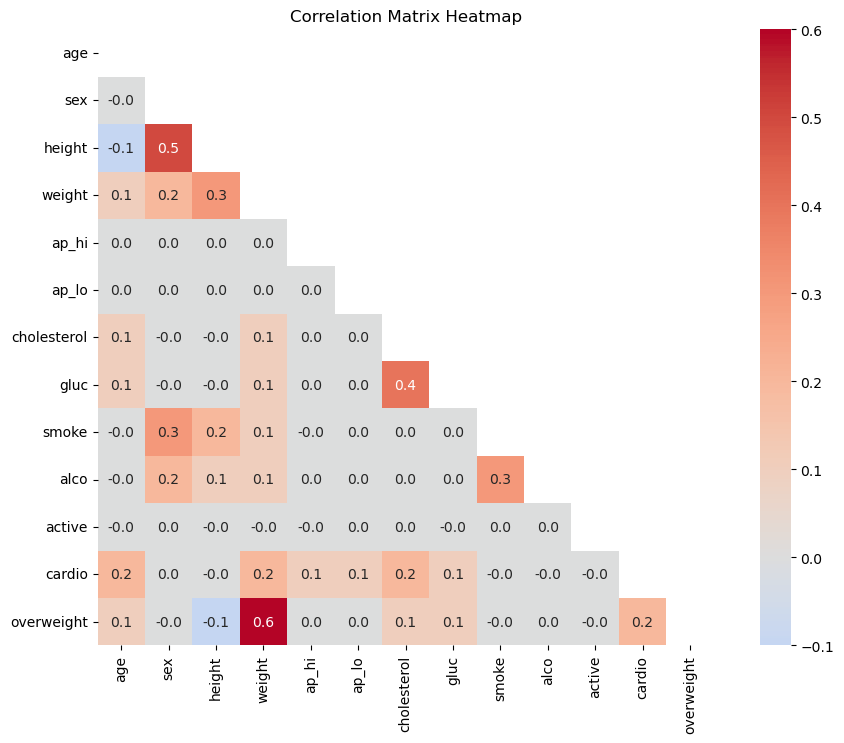

In [37]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    mask=mask,
    cmap='coolwarm',
    annot=True,
    fmt='.1f',
    center=0,
    square=True
)
plt.title("Correlation Matrix Heatmap")
plt.show()